# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("")
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

# Gavin TODO: Slice of 20% of train dataset for validation

X_train shape:  (39209, 32, 32, 3)
Y_train shape:  (39209,)

X_test shape:  (12630, 32, 32, 3)
Y_test shape:  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
signnames = pd.read_csv('signnames.csv')
n_classes = np.unique(y_train) #Fix me

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)

unique_classes = np.unique(signnames.ix[:,'SignName'])
n_classes = len(unique_classes)
print("Number of classes =", n_classes)

print("\nUnique sign names:")
for sign in unique_classes:
    print(sign)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

Unique sign names:
Ahead only
Beware of ice/snow
Bicycles crossing
Bumpy road
Children crossing
Dangerous curve to the left
Dangerous curve to the right
Double curve
End of all speed and passing limits
End of no passing
End of no passing by vehicles over 3.5 metric tons
End of speed limit (80km/h)
General caution
Go straight or left
Go straight or right
Keep left
Keep right
No entry
No passing
No passing for vehicles over 3.5 metric tons
No vehicles
Pedestrians
Priority road
Right-of-way at the next intersection
Road narrows on the right
Road work
Roundabout mandatory
Slippery road
Speed limit (100km/h)
Speed limit (120km/h)
Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (60km/h)
Speed limit (70km/h)
Speed limit (80km/h)
Stop
Traffic signals
Turn left ahead
Turn right ahead
Vehicles over 3.5 metric tons prohibited
Wild animals crossin

In [3]:
signnames[:10]

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

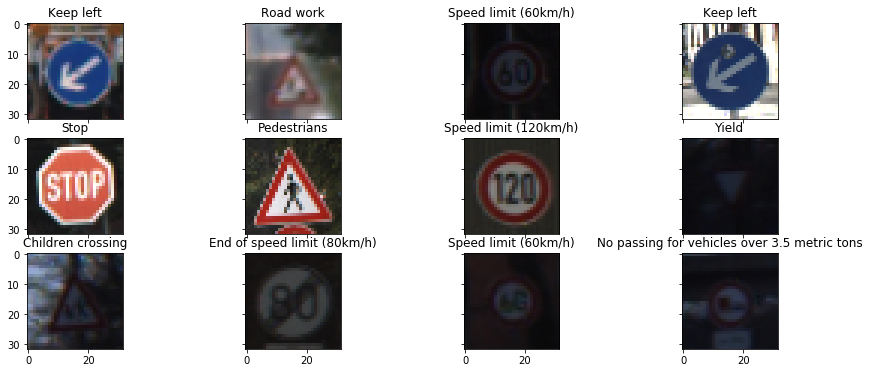

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

rows, columns = 3,4

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(15, 6), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

for r in range(rows):
    for c in range(columns):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        ax[r, c].imshow(image)
        #ax[r, c].axis('off')
        ax[r, c].set_title(signnames.ix[y_train[index], 'SignName'])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I shuffled the training data because we want to ensure that the training examples are not highly correlated. Mostly, this is to ensure that the validation set later that we use is representative of the variations found in the training data set.

However, since we take mini-batches of the data for mini-batch gradient descent (and related optimizers, such as the Adam Optimizer), convergence depends on low correlation of the training data - though you will see in the training section that the shuffling occurs for each mini-batch, so the shuffling in the preprocessing section is less relevant.

The preprocessing pipeline also included experiments with:

•	Rescaling and cropping – to cope with different input sizes and shapes of images

•	Blurring – To provide small variations of the data for which we know the labels

•	Grayscale (and flattening) – To reduce noise/dimensional complexity of the data

To decide on the efficacy of each of these pipeline stages, validation accuracy was measured based on a set # of epochs and hyperparameters remaining constant. Noting that by applying pipeline stages to the data we are AUGMENTING the data set, caution had to be exercised to ensure that the benefit of preprocessing was not simply due to the neural network effectively making more passes on the dataset; on hindsight, controls could have been better set up that monitored validation accuracy after doing untransformed augmentation of the data, though this was not performed in this exercise.


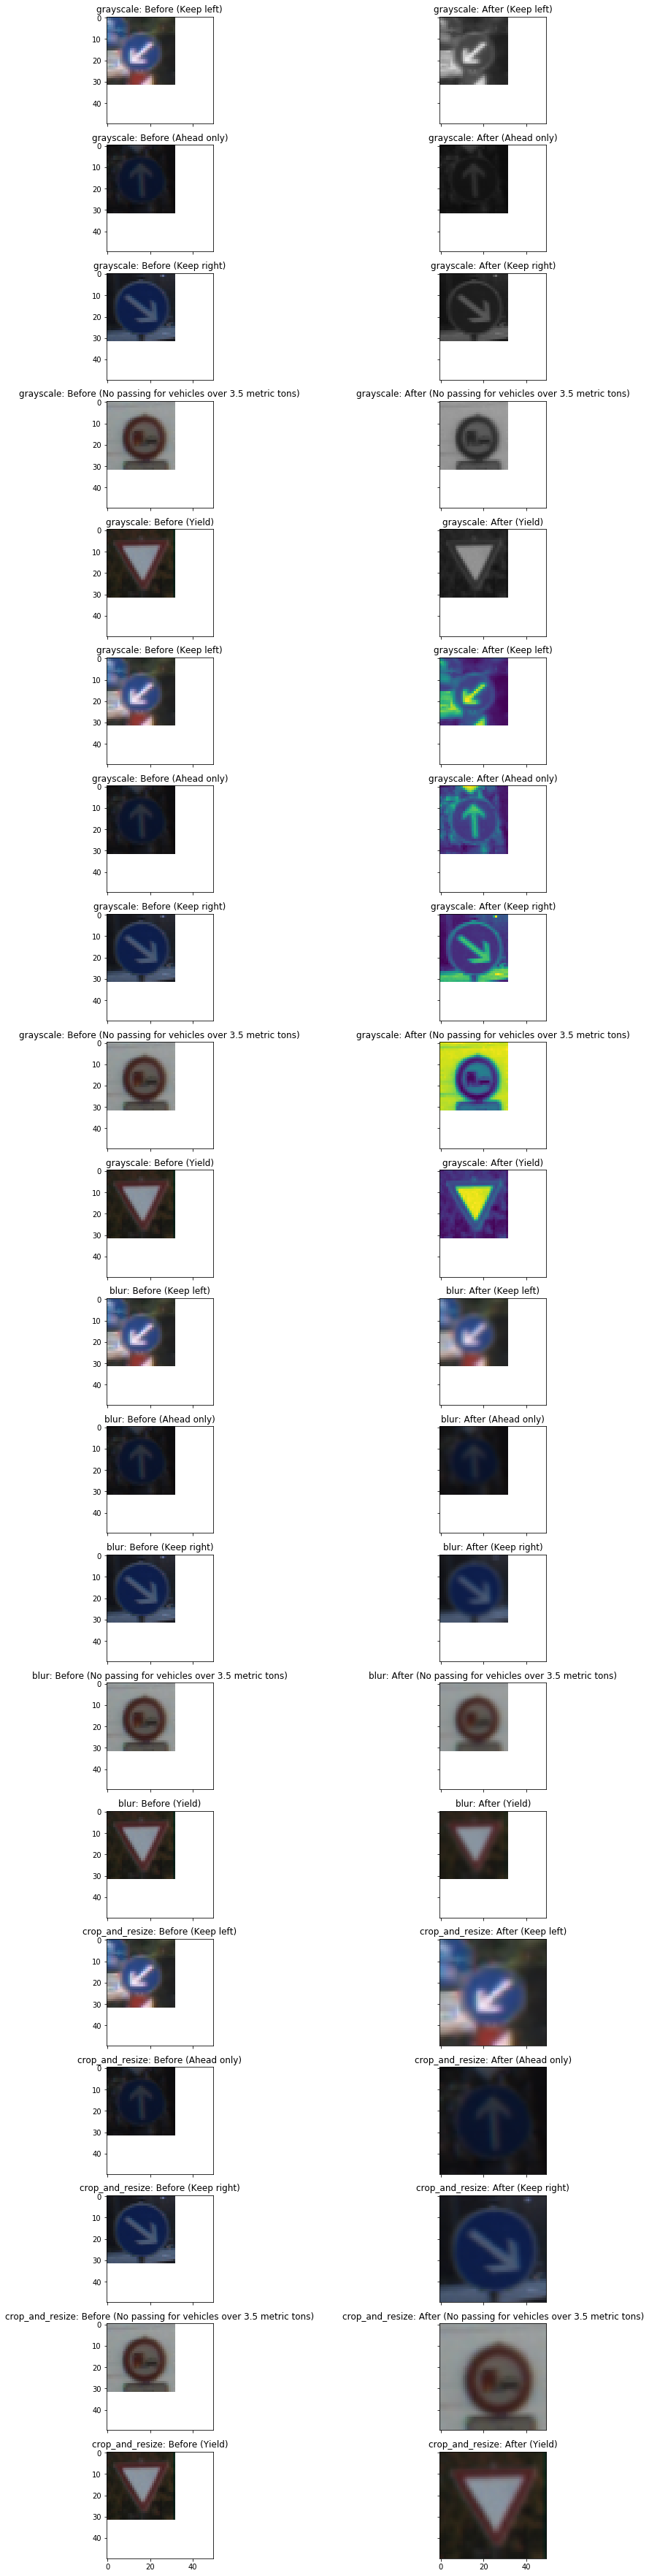

In [6]:
import cv2

def grayscale(input_image, reduce_dim = False):
    output_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
    output_image = output_image[:, :, np.newaxis]
    if not reduce_dim:
        output_image = np.repeat(output_image, 3, axis=2)
    return output_image

def blur(input_image, factor=2):
    kernel = np.ones((factor,factor),np.float32)/(factor**2)
    output_image = cv2.filter2D(input_image,-1,kernel)
    if len(output_image.shape) == 2:
        output_image = output_image[:, :, np.newaxis]
    return output_image

def crop_and_resize(input_image, dim_pixels=32):
    # Get the smallest dimension of the input image
    shape = input_image.shape
    
    output_image = np.copy(input_image)
    
    if shape[0] != shape[1]: #Cropping required
        smallest_dim = shape[0] if shape[0] < shape[1] else shape[1]
        output_image = output_image[:smallest_dim, :smallest_dim, :]
        
    output_image = cv2.resize(output_image, (dim_pixels, dim_pixels)) 
    return output_image

pipeline_stages = [(grayscale, (False,)), (grayscale, (True,)), (blur, (3,)), (crop_and_resize, (50,))]

## Visualize the effect of the pipeline stages for development purposes
nrows = 5
fig, ax = plt.subplots(nrows=nrows * len(pipeline_stages), ncols=2, figsize=(15, 16*len(pipeline_stages)), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

for index, (stage, params) in enumerate(pipeline_stages):
    for i in range(nrows):
        example_image = X_train[i]
        example_label = signnames.ix[y_train[i], 'SignName'][:50]
        image = stage(example_image, *params)

        # Output results
        ax[index * nrows + i, 0].set_title(stage.__name__ + ": Before (" + example_label + ")")
        ax[index * nrows + i, 0].imshow(example_image)
        ax[index * nrows + i, 1].set_title(stage.__name__ + ": After (" + example_label + ")")
        if image.shape[2] == 1:
            image = image[:,:,0]
        ax[index * nrows + i, 1].imshow(image)

In [7]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

class PipelineSet:
    def __init__(self, pipelines):
        self.pipelines = pipelines

class Pipeline:
    def __init__(self, pipeline_stages):
        self.pipeline_stages = pipeline_stages
        
class PipelineStage:
    def __init__(self, stage, params):
        self.stage = stage
        self.params = params

    def run(self, image_input):
        return self.stage(image_input, *self.params)
    
def apply_across_dataset(pipeline_stage, data):
    result = None
    sample_image = data[0]
    sample_result = pipeline_stage.run(sample_image)
    dimensions = list(data.shape)
    dimensions[3] = sample_result.shape[2]
    result = np.zeros(dimensions)
    for idx, image in enumerate(data):
        result[idx] = pipeline_stage.run(image)
    return result

def apply_for_all_data(pipeline_stage, X_train, y_train, X_validation, y_validation, X_test, y_test):
    X_train_p = apply_across_dataset(pipeline_stage, X_train)
    X_validation_p = apply_across_dataset(pipeline_stage, X_validation)
    X_test_p = apply_across_dataset(pipeline_stage, X_test)
    
    # Processsed labels stay the same
    y_train_p, y_validation_p, y_test_p = y_train, y_validation, y_test

        
    return X_train_p, y_train_p, X_validation_p, y_validation_p, X_test_p, y_test_p

def process_pipeline_set(X_train, y_train, X_test, y_test, pipeline_set):
    # Extract validation training set from training set
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, \
                                                                                   random_state=42, test_size=0.2)
    
    X_train_res = None #initialize to None before assignment later
    
    for pipeline in pipeline_set.pipelines:
        print("Processing pipeline: ", pipeline)
        # initialize the datasets to the original for each pipeline in the set
        X_train_p, y_train_p, X_validation_p, y_validation_p, \
            X_test_p, y_test_p = X_train, y_train, X_validation, y_validation, X_test, y_test
        
        for stage in pipeline.pipeline_stages:
            # For each dataset, apply the stage in the pipeline
            
            X_train_p, y_train_p, X_validation_p, y_validation_p, \
                X_test_p, y_test_p = apply_for_all_data(stage, X_train_p, y_train_p, X_validation_p, y_validation_p, \
                                                                                         X_test_p, y_test_p)
        
        if X_train_res is None: # If this is not defined since we are going through the first loop
            X_train_res = X_train_p
            X_validation_res = X_validation_p
            X_test_res = X_test_p
            
            y_train_res = y_train_p
            y_validation_res = y_validation_p
            y_test_res = y_test_p
        else:
            # Concatenate the results
            X_train_res = np.concatenate((X_train_res, X_train_p), axis=0)
            X_validation_res = np.concatenate((X_validation_res, X_validation_p), axis=0)
            X_test_res = np.concatenate((X_test_res, X_test_p), axis=0)
            
            y_train_res = np.concatenate((y_train_res, y_train_p), axis=0)
            y_validation_res = np.concatenate((y_validation_res, y_validation_p), axis=0)
            y_test_res = np.concatenate((y_test_res, y_test_p), axis=0)
        
    return X_train_res, y_train_res, X_validation_res, y_validation_res, X_test_res, y_test_res

no_processing_pipeline = Pipeline([])
grayscale_and_blur = Pipeline([PipelineStage(grayscale, ()), PipelineStage(blur, (2,))])
grayscale_only = Pipeline([PipelineStage(grayscale, ())])
blur_only = Pipeline([PipelineStage(blur, (2,))])

# input_pipeline_set = PipelineSet([no_processing_pipeline, grayscale_and_blur, grayscale_only, blur_only])
# input_pipeline_set = PipelineSet([no_processing_pipeline])

input_pipeline_set = PipelineSet([Pipeline([PipelineStage(grayscale, (True,))])])

X_train_processed, y_train_processed, \
X_validation_processed, y_validation_processed, \
X_test_processed, y_test_processed = process_pipeline_set(X_train, y_train, X_test, y_test, input_pipeline_set)                      

Processing pipeline:  <__main__.Pipeline object at 0x7ff64244a2e8>


In [8]:
X_train_processed.shape

(31367, 32, 32, 1)

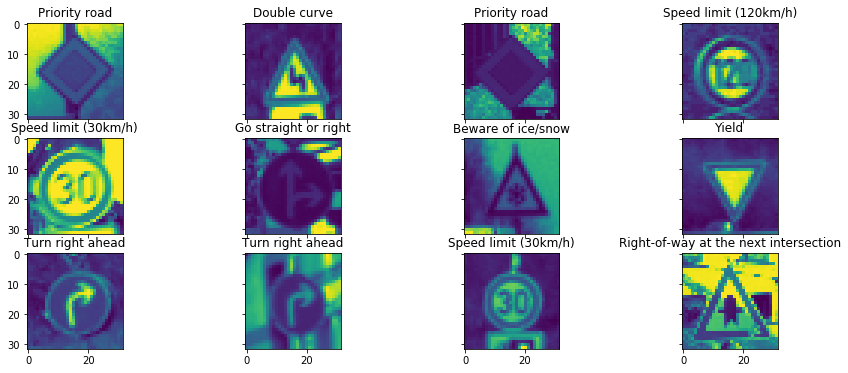

In [9]:
rows, columns = 3,4

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(15, 6), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

for r in range(rows):
    for c in range(columns):
        index = random.randint(0, len(X_train_processed))
        image = X_train_processed[index]
        if image.shape[2] == 1:
            image = image[:,:,0]
        ax[r, c].imshow(image)
        #ax[r, c].axis('off')
        ax[r, c].set_title(signnames.ix[y_train_processed[index], 'SignName'])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Validation was 20% off of the training data set (after preprocessing, including any data augmentations).

For generating new data, I created a pipeline that was able to accept an array of function inputs to process the data. The pipeline processor currently applies the transformation to each example of the train/val/test data and augments them to the appropriate dataset. This is described more thoroughly in Question 1.


In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def test_dim(inp):
    # Call on the output of a conv layer; the multiplication error that ensues will indicate the dimensions
    mu = 0
    sigma = 0.1
    
    fc0 = flatten(inp)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(999999, 1920), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1920))
    weight_tensors.append(fc1_W)
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

def LeNet(x, dropout = None, num_channels = 3):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weight_tensors = [] # a list of tensors that will be used to calculate the L2 losses for regularization
    
    # SOLUTION: Layer 1: Convolutional. 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, num_channels, 6), mean = mu, stddev = sigma))
    weight_tensors.append(conv1_W)
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. 
    if dropout is None:
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    else:
        conv1 = tf.nn.dropout(conv1, dropout)
        #sqrt(4704/6) = 28 -> output is 28x28x6

    # SOLUTION: Layer 2: Convolutional. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    weight_tensors.append(conv2_W)
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. 
    if dropout is None:
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    else:
        conv2 = tf.nn.dropout(conv2, dropout)
        #sqrt(9216/16) = 24 -> output is 24x24x16

    # SOLUTION: Flatten. 
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. 
    if dropout is None:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
    else:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(9216, 1920), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(1920))
    weight_tensors.append(fc1_W)
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    if dropout is not None:
        fc1 = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected.
    if dropout is None:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
    else:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(1920, 1344), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(1344))
    weight_tensors.append(fc2_W)    
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    if dropout is not None:
        fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected.
    if dropout is None:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    else:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(1344, 43), mean = mu, stddev = sigma))
    weight_tensors.append(fc3_W) 
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, weight_tensors



In [11]:
import functools

num_channels = 3
rate = 0.001
beta = 0.01

def setup_model(num_channels, rate, beta, dropout = 0.75):
    x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)

    # logits = LeNet(x)
    logits, weight_tensors = LeNet(x, dropout=dropout, num_channels=num_channels)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)

    l2_loss_tensors = [beta*tf.nn.l2_loss(x) for x in weight_tensors]
    l2_loss = functools.reduce(lambda x,y: x + y, l2_loss_tensors)

    loss_operation_with_l2 = tf.reduce_mean(cross_entropy + l2_loss)

    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    #training_operation = optimizer.minimize(loss_operation)
    training_operation = optimizer.minimize(loss_operation_with_l2)
    
    return x, y, training_operation, one_hot_y, logits
    
x, y, training_operation, one_hot_y, logits = setup_model(num_channels, rate, beta, 0.75)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Implemented here is a modified LeNet architecture; differences are as follows:

•	Accepts input of 32x32x3 (3 channels instead of 1)

•	#classes increased to 43 as output

•	All Activation Functions chosen to be RELU’s

    ♣	32x32x3 input

    ♣	5x5 convolution to 6 feature maps (output = 28x28x6)

    ♣	Activation (Relu)

    ♣	Max Pooling 2x2 (output = 14x14x6)

    ♣	5x5 convolution to 16 feature maps (output = 10x10x16)

    ♣	Activation (Relu)

    ♣	Max Pooling 2x2 (output = 5x5x16)

    ♣	Flatten (output = 400)

    ♣	Fully connected layer (400 x 120)

    ♣	Activation (Relu)

    ♣	Fully connected layer (120 x 84)

    ♣	Activation (Relu)

    ♣	Fully connected layer (84 x 43)

    ♣	Softmax


Additionally, experiments were done to include Dropout IN PLACE of the Max Pooling; the LeNet(x) function also now takes a parameter to choose dropout on all the stage outputs INSTEAD OF Max Pooling (though after experimentation, it was decided that given the amount of data and size of network we had, it was not effective in this case):

•	Instead of subsampling (or even max pooling), dropout was implemented

•	Because of dropout, the layers have fundamentally different dimensions:

    ♣	32x32x3 input

    ♣	5x5 convolution to 6 feature maps (output = 28x28x6)

    ♣	Activation (Relu)

    ♣	Dropout

    ♣	5x5 convolution to 16 feature maps (output = 24x24x16)

    ♣	Activation (Relu)

    ♣	Dropout

    ♣	Flatten (output = 9216)

    ♣	Fully connected layer (9216 x 1920)

    ♣	Activation (Relu)

    ♣	Dropout

    ♣	Fully connected layer (1920 x1344)

    ♣	Activation (Relu)

    ♣	Dropout

    ♣	Fully connected layer (1344 x 43)

    ♣	Softmax

NOTE: As part of training, there was iteration over hyperparameters and the preprocessing pipeline; this led to choosing the non-dropout method, though the functions defined allow flexibility in using the LeNet WITH and WITHOUT dropout with small changes to the architecture.


In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 3 #30
BATCH_SIZE = 128

def return_evaluate_fn(x, y, logits, one_hot_y, batch_size):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    
    return evaluate

evaluate = return_evaluate_fn(x ,y, logits, one_hot_y, BATCH_SIZE)

In [13]:
def train(evaluate, x, y, training_operation, X_train_processed, y_train_processed, X_validation_processed, y_validation_processed, batch_size, epochs, verbose=True, save=None):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_processed)

        print("Training...")
        print()
        for i in range(epochs):
            X_train_processed, y_train_processed = shuffle(X_train_processed, y_train_processed)
            for offset in range(0, num_examples, batch_size):
                # print(offset, " of ", num_examples)
                end = offset + batch_size
                batch_x, batch_y = X_train_processed[offset:end], y_train_processed[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_validation_processed, y_validation_processed)
            if verbose:
                print("EPOCH {} ...".format(i+1))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()

        print("Final Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        if save is not None:
            saver = tf.train.Saver()
            saver.save(sess, './' + save)
            print("Model saved")
    
# train(evaluate, training_operation, X_train_processed, \
#               y_train_processed, X_validation_processed, y_validation_processed, BATCH_SIZE, EPOCHS)

# Define pipeline stages
grayscale_stage = PipelineStage(grayscale, ())
grayscale_stage_reduce = PipelineStage(grayscale, (True,))
blur_stage_2 = PipelineStage(blur, (2,))
blur_stage_3 = PipelineStage(blur, (3,))
crop_and_resize_stage = PipelineStage(crop_and_resize, ())
    
class TrainingInstance:
    # Encapsulating all the fields required to preprocess data and train
    
    def __init__(self, epochs, batch_size, dropout, num_channels, rate, beta, input_pipeline_set):
        self.epochs = epochs
        self.batch_size = batch_size
        self.dropout = dropout
        self.num_channels = num_channels
        self.rate = rate
        self.beta = beta
        self.input_pipeline_set = input_pipeline_set
        
    def run(self, verbose=True, save=None):
        # Perform data preprocessing
        X_train_processed, y_train_processed, \
            X_validation_processed, y_validation_processed, \
            X_test_processed, y_test_processed = process_pipeline_set(X_train, y_train, X_test, y_test, self.input_pipeline_set)
        
        self.x, self.y, training_operation, self.one_hot_y, self.logits = setup_model(self.num_channels, self.rate, self.beta, self.dropout)
        evaluate = return_evaluate_fn(self.x ,self.y, self.logits, self.one_hot_y, self.batch_size)
        train(evaluate, self.x, self.y, training_operation, X_train_processed, y_train_processed, X_validation_processed, y_validation_processed, \
                     self.batch_size, self.epochs, verbose, save)
        


In [47]:
# Control run
pipeline_set = PipelineSet([Pipeline([])]) #Make no changes
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)

print("Base case training run")
training_instance.run()

Base case training run
Processing pipeline:  <__main__.Pipeline object at 0x7effa4ab2c88>
Training...

EPOCH 1 ...
Validation Accuracy = 0.608

EPOCH 2 ...
Validation Accuracy = 0.825

EPOCH 3 ...
Validation Accuracy = 0.890

EPOCH 4 ...
Validation Accuracy = 0.907

EPOCH 5 ...
Validation Accuracy = 0.916

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.939

EPOCH 8 ...
Validation Accuracy = 0.939

EPOCH 9 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.946

Final Validation Accuracy = 0.946



In [48]:
batch_sizes = [16*2**x for x in range(8)]

for batch_size in batch_sizes:
    pipeline_set = PipelineSet([Pipeline([])]) #Make no changes
    training_instance = TrainingInstance(5, batch_size, None, 3, 0.001, 0, pipeline_set)

    print("Batch Size test for speed - BATCH_SIZE=", batch_size)
    %time training_instance.run(verbose=False)
    
# We observe that for approximately the same run time, we get better performance when BATCH_SIZE = 128 and it decreases
# as it gets larger; as we decrease beyond 128, time increases significantly for processing without validation accuracy gain.

Batch Size test for speed - BATCH_SIZE= 16
Processing pipeline:  <__main__.Pipeline object at 0x7eff767500b8>
Training...

Final Validation Accuracy = 0.924

CPU times: user 55.1 s, sys: 10.3 s, total: 1min 5s
Wall time: 41.5 s
Batch Size test for speed - BATCH_SIZE= 32
Processing pipeline:  <__main__.Pipeline object at 0x7eff76750240>
Training...

Final Validation Accuracy = 0.917

CPU times: user 32.3 s, sys: 5.62 s, total: 38 s
Wall time: 27.6 s
Batch Size test for speed - BATCH_SIZE= 64
Processing pipeline:  <__main__.Pipeline object at 0x7eff95fc6d30>
Training...

Final Validation Accuracy = 0.936

CPU times: user 21.2 s, sys: 2.93 s, total: 24.2 s
Wall time: 20.6 s
Batch Size test for speed - BATCH_SIZE= 128
Processing pipeline:  <__main__.Pipeline object at 0x7eff6840eeb8>
Training...

Final Validation Accuracy = 0.923

CPU times: user 15.7 s, sys: 2.47 s, total: 18.2 s
Wall time: 16.8 s
Batch Size test for speed - BATCH_SIZE= 256
Processing pipeline:  <__main__.Pipeline object 

In [49]:
# Check for the best pipeline for processing
# We want to first observe if any of the INDIVIDUAL stages produce enhancements
print("###############")
print("Grayscale")
pipeline_set = PipelineSet([Pipeline([grayscale_stage])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)
print("###############")
print("Grayscale reduce")
pipeline_set = PipelineSet([Pipeline([grayscale_stage_reduce])])
training_instance = TrainingInstance(10, 128, None, 1, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)
print("###############")
print("blur_stage_2")
pipeline_set = PipelineSet([Pipeline([blur_stage_2])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)
print("###############")
print("blur_stage_3")
pipeline_set = PipelineSet([Pipeline([blur_stage_3])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)
print("###############")
# grayscale_stage = PipelineStage(grayscale, ())
# grayscale_stage_reduce = PipelineStage(grayscale, (True,))
# blur_stage_2 = PipelineStage(blur, (2,))
# blur_stage_3 = PipelineStage(blur, (3,))
# crop_and_resize_stage = PipelineStage(crop_and_resize, ())

###############
Grayscale
Processing pipeline:  <__main__.Pipeline object at 0x7efedd532240>
Training...

EPOCH 1 ...
Validation Accuracy = 0.712

EPOCH 2 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Validation Accuracy = 0.881

EPOCH 4 ...
Validation Accuracy = 0.898

EPOCH 5 ...
Validation Accuracy = 0.913

EPOCH 6 ...
Validation Accuracy = 0.917

EPOCH 7 ...
Validation Accuracy = 0.940

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.943

Final Validation Accuracy = 0.943

###############
Grayscale reduce
Processing pipeline:  <__main__.Pipeline object at 0x7efedc97cba8>
Training...

EPOCH 1 ...
Validation Accuracy = 0.743

EPOCH 2 ...
Validation Accuracy = 0.854

EPOCH 3 ...
Validation Accuracy = 0.907

EPOCH 4 ...
Validation Accuracy = 0.924

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.935

EPOCH 7 ...
Validation Accuracy = 0.947

EPOCH 8 ...
Validation Accuracy = 0.948

EPOCH 9

In [83]:
# Interestingly, all of the different processing techniques resulted in strong output performance for classification.
# We now investigate what happens if we augment different kinds of data together

print("###############")
print("Normal + Grayscale")
pipeline_set = PipelineSet([Pipeline([]), Pipeline([grayscale_stage])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("###############")
print("Normal + blur_stage_2")
pipeline_set = PipelineSet([Pipeline([]), Pipeline([blur_stage_2])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("###############")
print("Grayscale + Grayscale & blur_stage_2")
pipeline_set = PipelineSet([Pipeline([grayscale_stage]), Pipeline([grayscale_stage, blur_stage_2])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("###############")
print("Grayscale_reduce + Grayscale_reduce & blur_stage_2")
pipeline_set = PipelineSet([Pipeline([grayscale_stage_reduce]), Pipeline([grayscale_stage_reduce, blur_stage_2])])
training_instance = TrainingInstance(10, 128, None, 1, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("###############")
print("Grayscale_reduce + Grayscale_reduce & blur_stage_2 + Grayscale_reduce & blur_stage_3")
pipeline_set = PipelineSet([Pipeline([grayscale_stage_reduce]), Pipeline([grayscale_stage_reduce, blur_stage_2]), Pipeline([grayscale_stage_reduce, blur_stage_3])])
training_instance = TrainingInstance(10, 128, None, 1, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("###############")
print("Grayscale + Grayscale & blur_stage_2 + Grayscale & blur_stage_3")
pipeline_set = PipelineSet([Pipeline([grayscale_stage]), Pipeline([grayscale_stage, blur_stage_2]), Pipeline([grayscale_stage, blur_stage_3])])
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

# Also, although we didn't try, we COULD have resized and cropped for more data to train on.
# We also must realise that we are not comparing apples to apples above - having different amount of data equates effectively
# running for a different number of EPOCHS

###############
Normal + Grayscale
Processing pipeline:  <__main__.Pipeline object at 0x7f3112553e10>
Processing pipeline:  <__main__.Pipeline object at 0x7f3112553eb8>
Training...

EPOCH 1 ...
Validation Accuracy = 0.818

EPOCH 2 ...
Validation Accuracy = 0.912

EPOCH 3 ...
Validation Accuracy = 0.938

EPOCH 4 ...
Validation Accuracy = 0.947

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.958

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.966

Final Validation Accuracy = 0.966

###############
Normal + blur_stage_2
Processing pipeline:  <__main__.Pipeline object at 0x7f3109911080>
Processing pipeline:  <__main__.Pipeline object at 0x7f3109c77c18>
Training...

EPOCH 1 ...
Validation Accuracy = 0.855

EPOCH 2 ...
Validation Accuracy = 0.919

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.955

EPOCH 5 ...
Validation 

It appears that the grayscale performance was comparable to the original image; the blurring however seemed to have
positive effects with augmentation. Hence, we settle with the following pipeline:

In [18]:
print("Chosen pipeline: Normal + blur_stage_2")
pipeline_set = PipelineSet([Pipeline([]), Pipeline([blur_stage_2]), Pipeline([blur_stage_3])])

# Try out regularization

print("Epoch 10")
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("Epoch 10 with dropout")
training_instance = TrainingInstance(10, 128, 0.75, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True)

print("Epoch 10 with regularization")
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0.01, pipeline_set)
training_instance.run(verbose=True)

print("Epoch 10 with dropout and regularization")
training_instance = TrainingInstance(10, 128, 0.75, 3, 0.001, 0.01, pipeline_set)
training_instance.run(verbose=True)

Chosen pipeline: Normal + blur_stage_2
Epoch 10
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939b5f8>
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939bc18>
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939ba20>
Training...

EPOCH 1 ...
Validation Accuracy = 0.914

EPOCH 2 ...
Validation Accuracy = 0.939

EPOCH 3 ...
Validation Accuracy = 0.963

EPOCH 4 ...
Validation Accuracy = 0.962

EPOCH 5 ...
Validation Accuracy = 0.973

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.968

EPOCH 8 ...
Validation Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.978

EPOCH 10 ...
Validation Accuracy = 0.971

Final Validation Accuracy = 0.971

Epoch 10 with dropout
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939b5f8>
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939bc18>
Processing pipeline:  <__main__.Pipeline object at 0x7f4c5939ba20>
Training...

EPOCH 1 ...
Validation Accuracy = 0.059

EPOCH 2 ...
Val

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Used the AdamOptimizer - this has a diminishing learning rate which has been shown to work well in many cases.

Batch size was chosen to be 128 - powers of 2 for batch size were tested and the validation results + time taken to train were considered and concluded that 128 was the best.

Epochs was set to 10 - Although using a GPU instance, we could afford to train with higher epochs, there was very little observed benefit in doing so (in terms of validation accuracy) and was not worth the risk in overtraining (especially since we extended the data later by doing small alterations of the current data set).

Overtraining is very dependent on regularization; however, in observing the training epochs there was no strong evidence that this was happening. This could largely be due to the small image sizes that were input, as well as having a fairly substantial number of training examples to work with. It was noted that dropout did very poorly, perhaps because of an overly aggressive dropout percentage given the small image sizes/relatively tame number of feature maps.

The result we hence chose was without any regularization.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Predominantly trial & error; the idea was to produce a pipeline that could be easily iterated over to try different combinations of input preprocessing. The LeNet architecture is known to be sound, so modifications were made based on knowledge of tried-and-true improvements such as dropout and regularization. Checking the performance for validation accuracy was how the best model was chosen.

Epochs was increased as the higher the better (so long as overfitting does not occur, which can be observed by monitoring validation accuracy during training), though at the expense of computational cost. Having the ability to test with a GPU on AWS made this possible.

I tried as much as possible to change individual hyperparameters at a time and understand conceptually WHY the impact changed, so that I could make an educated decision on whether or not I should include any changes I experimented with. E.g. improvements in the pipeline process needed to factor in the effects of simply generating new data, which may have an impact akin to increasing # EPOCHS instead of having beneficial preprocessing attributes conferred.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)
(5,)


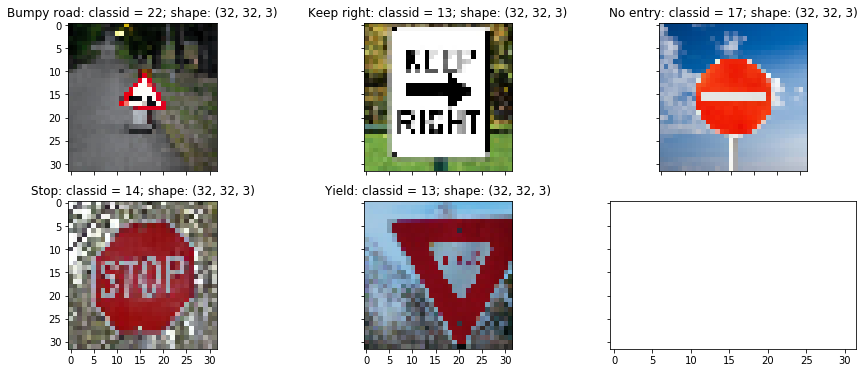

In [43]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

images = [("bumpy.jpg", "Bumpy road", 22), \
          ("keep_right.jpg", "Keep right", 13), \
          ("no-entry.jpg", "No entry", 17), \
          ("stop.jpg", "Stop", 14), \
          ("yield.jpg", "Yield", 13)]

rows, columns = 2,3

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(15, 6), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

my_X = np.zeros((len(images), 32, 32, 3))
my_y = np.zeros((len(images),))

for r in range(rows):
    for c in range(columns):
        idx = c + r*columns
        try:
            image_tuple = images[idx]
        except:
            break
        image_file, name, classid = image_tuple
        image = plt.imread(image_file, format=None)
        image = crop_and_resize(image)
        ax[r, c].imshow(image)
        ax[r, c].set_title(name + ": classid = " + str(classid) + "; shape: " + str(image.shape))
        
        my_X[idx] = image
        my_y[idx] = classid
        
        
print(my_X.shape)
print(my_y.shape)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The blurriness is a big component in these images; these occur because there was rough rescaling of the images down to 32x32. The 1st is unintelligible to the human eye; the 5th is perhaps only recognizable by the shape of the image. For the remaining, these may be more decipherable - though it should be noted that the Keep Right sign can have a lot of variation in design which can cause issues with classification

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

saved_model = "final_model"
pipeline_set = PipelineSet([Pipeline([]), Pipeline([blur_stage_2]), Pipeline([blur_stage_3])])

print("Final: Epoch 10")
training_instance = TrainingInstance(10, 128, None, 3, 0.001, 0, pipeline_set)
training_instance.run(verbose=True, save = saved_model)

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, './' + saved_model)
    
    #####################
    # Need to assess which images were classified correctly and output the softmax, total accuracy
    
    x = training_instance.x
    y = training_instance.y
    logits = training_instance.logits
    one_hot_y = training_instance.one_hot_y
    batch_size = training_instance.batch_size
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    softmax_operation = tf.nn.softmax(logits)
    
    def evaluate_accuracy(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    
    def evaluate_prediction_correctness(X_data, y_data):
        num_examples = len(X_data)
        prediction_correctness = None # An array of batches that contain tensors of the result
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            is_correct = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
            if prediction_correctness is None:
                prediction_correctness = is_correct
            else:
                prediction_correctness = tf.concat(0, [prediction_correctness, is_correct])
        return prediction_correctness
            
    def evaluate_softmaxes(X_data, y_data):
        num_examples = len(X_data)
        softmaxes = None # An array of batches that contain tensors of the result
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            if softmaxes is None:
                softmaxes = sess.run(softmax_operation, feed_dict={x: batch_x, y: batch_y})
            else:
                softmaxes = tf.concat(0, [prediction_correctness, sess.run(softmax_operation, feed_dict={x: batch_x, y: batch_y})])
        return softmaxes

    
    # logits, one_hot_y
    accuracy, correctness, softmaxes = evaluate_accuracy(my_X, my_y), evaluate_prediction_correctness(my_X, my_y), \
    evaluate_softmaxes(my_X, my_y)
    
print ("\n\n###########")
print("evaluate_accuracy", accuracy)
print("evaluate_prediction_correctness", correctness)
print("evaluate_softmaxes: ", softmaxes)
    
    
    

Final: Epoch 10
Processing pipeline:  <__main__.Pipeline object at 0x7ff66c435240>
Processing pipeline:  <__main__.Pipeline object at 0x7ff66c4357b8>
Processing pipeline:  <__main__.Pipeline object at 0x7ff66c435550>
Training...

EPOCH 1 ...
Validation Accuracy = 0.914

EPOCH 2 ...
Validation Accuracy = 0.945

EPOCH 3 ...
Validation Accuracy = 0.950

EPOCH 4 ...
Validation Accuracy = 0.953

EPOCH 5 ...
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.972

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.975

EPOCH 10 ...
Validation Accuracy = 0.974

Final Validation Accuracy = 0.974

Model saved


###########
evaluate_accuracy 0.40000000596
evaluate_prediction_correctness [False False  True  True False]
evaluate_softmaxes:  [[  8.63652589e-30   1.41886885e-29   5.63432024e-22   1.45055733e-20
    6.65026306e-28   1.93278964e-15   3.41894854e-32   1.06354602e-13
    5.69912248e-16   2.56881972e-13   1.3

In [19]:
predictions = [np.argmax(x) for x in softmaxes]
print(predictions)

for idx, label in enumerate(signnames.ix[predictions, 'SignName']):
    print("Image: ", images[idx][1], "| Predicted label: ", label)


[29, 17, 17, 14, 25]
Image:  Bumpy road | Predicted label:  Bicycles crossing
Image:  Keep right | Predicted label:  No entry
Image:  No entry | Predicted label:  No entry
Image:  Stop | Predicted label:  Stop
Image:  Yield | Predicted label:  Road work


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

It can be seen from the above cell that 2 out of 5 signs were predicted correctly; i.e. 40%. From the visualization of images, it can be seen that the images are very difficult to classify even for the human eye after scaling them down to 32x32; 

(5, 5)
[[29 28 23 20  9]
 [17 42 40 11 30]
 [17  0  1  2  3]
 [14  3 18 17  8]
 [25 11  1 18 26]]
[[  9.99910593e-01   8.94068653e-05   4.74147674e-12   7.32892046e-13
    2.56881972e-13]
 [  9.99296665e-01   5.45084360e-04   7.91741331e-05   5.38335116e-05
    2.52190384e-05]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.49687215e-22   8.74264375e-23   6.08145683e-23
    4.53036696e-23]
 [  6.53738201e-01   3.44248831e-01   1.96714862e-03   4.57967180e-05
    6.88953650e-09]]


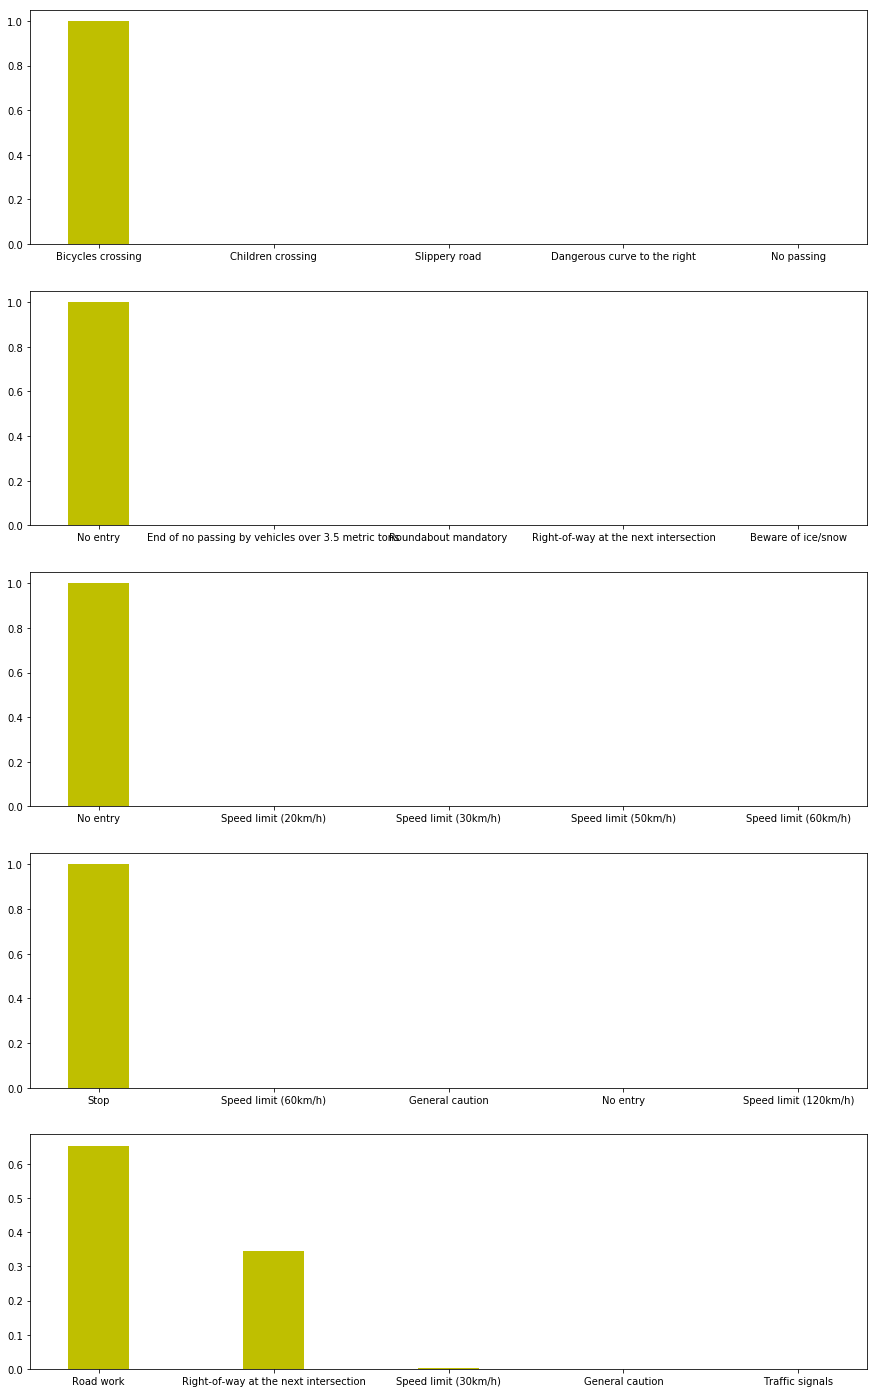

In [47]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top_softmaxes = sess.run(tf.nn.top_k(tf.constant(softmaxes), k=5))
    
    
df = pd.DataFrame(top_softmaxes.indices, columns=['1', '2', '3', '4', '5'], index=['a', 'b', 'c', 'd', 'e'])
names_matrix = ((df.applymap(lambda x: signnames.ix[x, 'SignName']).as_matrix()))

print(names_matrix.shape)
print(top_softmaxes.indices)
print(top_softmaxes.values)

rows = top_softmaxes.values.shape[0]
fig, ax = plt.subplots(nrows=rows, ncols=1, figsize=(15,rows*5))
ind = np.arange(top_softmaxes.values.shape[1])  # the x locations for the groups
width = 0.35       # the width of the bars

for idx, image in enumerate(images):        
    ax[idx].bar(ind + width, top_softmaxes.values[idx], width, color='y')

    ax[idx].set_xticks(ind + width)
    ax[idx].set_xticklabels(names_matrix[idx])
    
# Graph the probability with the label
#for softmax in softmaxes:
#   pass



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The only prediction that the model seemed uncertain of was the last - the "Yield" image that was predicted erroneously as "Road work". Yield was not in the top 5 predictions.

As for the other incorrect images: "Bumpy road" and "Keep right", these were fairly certain (and incorrect) predictions, with the correct label not appearing in the top 5 of either.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [53]:
# Improve data preprocessing (normalization, zero mean)

In [29]:
bars.